# Lowpass Gaussian Filter Kernels
> 0712238 Yan-Tong Lin, for DIP2021spring HW2-2

In [72]:
%matplotlib inline

In [73]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from scipy import signal
from scipy import misc

## Original Images

(1024, 1024)

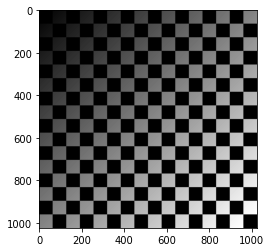

In [74]:
img = Image.open('checkerboard1024-shaded.tif')
plt.imshow(img, cmap=plt.get_cmap('gray'))
np.asarray(img).shape

(480, 640, 3)

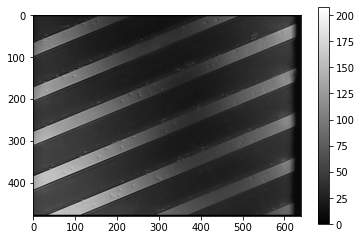

In [161]:
img2 = Image.open('N1.bmp')
plt.imshow(img2, cmap=plt.get_cmap('gray'))
plt.colorbar()
np.array(img2).shape

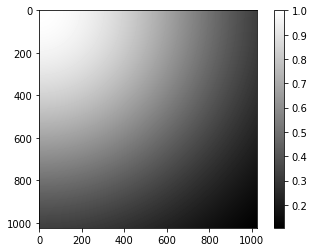

In [143]:
# Estimated Shade with Lowpass Gassian filter
n = 1024
sigma = n/1.5 # not 3 nice this is 1/4
x, y = np.mgrid[0:n, 0:n]
gaussian_kernel = np.exp(-(x**2+y**2)/(2*(sigma**2)))
# Normalization
gaussian_kernel = gaussian_kernel

plt.imshow(gaussian_kernel, cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()


In [ ]:
n = 512
sigma = 128 
x, y = np.mgrid[-n/2:n/2, -n/2:n/2]
shade_kernal = np.exp(-(x**2+y**2)/(2*(sigma**2)))
shade = signal.convolve2d(shade_kernal, img, boundary='symm', mode='same') #卷積

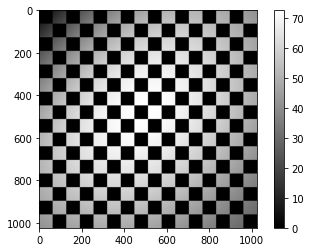

In [155]:
img1_clear = img*gaussian_kernel
plt.imshow(img1_clear, cmap=plt.get_cmap('gray'))
plt.colorbar()

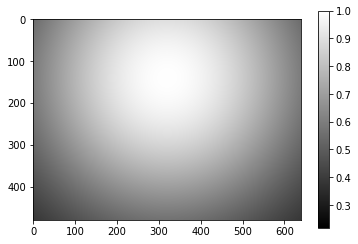

(480, 640, 3)


In [152]:
from math import sqrt
# Gassian filter
n = 640
m = 480
mx = 100
my = 0
sigma = sqrt(n**2+m**2)/3 # 3 since this is 1/4
x, y = np.mgrid[mx-m/2:mx+m/2, my-n/2:my+n/2]
gaussian_kernel2 = np.exp(-(x**2+y**2)/(2*(sigma**2)))
# Normalization
gaussian_kernel2 = np.asarray([gaussian_kernel2 for i in range(3)])
gaussian_kernel2 = np.transpose(gaussian_kernel2, axes=(1,2,0))
plt.imshow(gaussian_kernel2, cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()
print(gaussian_kernel2.shape)

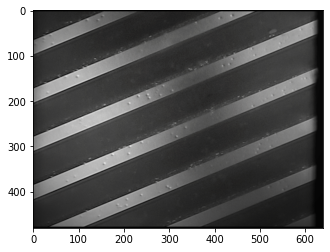

In [158]:
#img2_clear = np.multiply(img2, gaussian_kernel2)
#img2_clear = img2_clear.astype(int)*2
img2_clear = img2 * gaussian_kernel2
img2_clear = img2_clear.astype(int)*2
plt.imshow(img2_clear, cmap=plt.get_cmap('gray'))

In [136]:
img2_clear.shape

(480, 640, 3)

In [127]:
img2_clear[10][10][2]

12.62731959340897

In [128]:
a1 = np.array([
    [[1,1,1], [1,1,1], [0,0,0]],
    [[0,0,0], [0,0,0], [0,0,0]],
    [[0,0,0], [0,0,0], [0,0,0]],
])
a2 = np.array([
    [[0,0,0], [0,1,2], [0,0,0]],
    [[0,0,0], [1,1,1], [0,0,0]],
    [[0,0,0], [0,0,0], [0,0,0]],
])
np.multiply(a1, a2)

array([[[0, 0, 0],
        [0, 1, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])